## EURO-USD Exchange Rates During George Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)

This project develops a data visualization on Euro-USD exchange rates. I explore a dataset that describes daily exchange rates for the euro between 1999 and 2021. The dataset was prepared by Daria Chemkaeva using European Central Bank as a source and posted at Kaggle.com (kaggle.com/lsind18/euro-exchange-daily-rates-19992020). I focus on Euro-USD exchange rates during the presidency of three US presidents.

In [46]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2021.csv')
exchange_rates.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Algerian dinar ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Moroccan dirham ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,9/20/2021,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,7.4359,NaN,NaN,0.85705,NaN,9.1188,7.5055,353.97,16742.86,3.7635,86.272,152.0,128.18,1393.32,NaN,NaN,NaN,NaN,23.6419,4.9098,10.243,1.6694,58.845,4.5997,4.9493,86.07,10.2173,1.5839,NaN,NaN,39.062,10.1512,NaN,1.1711,17.3301
1,9/17/2021,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,7.436,NaN,NaN,0.85363,NaN,9.1691,7.5092,351.49,16762.9,3.7752,86.5335,151.4,129.61,1386.26,NaN,NaN,NaN,NaN,23.4722,4.914,10.1208,1.6658,58.819,4.5804,4.9488,85.4338,10.1553,1.5851,NaN,NaN,39.145,10.1323,NaN,1.178,17.1891
2,9/16/2021,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,7.436,NaN,NaN,0.85025,NaN,9.1575,7.5041,350.19,16766.34,3.7742,86.473,151.2,128.67,1380.44,NaN,NaN,NaN,NaN,23.3728,4.8952,10.1293,1.6548,58.715,4.5763,4.9488,85.2347,10.1518,1.5805,NaN,NaN,38.918,9.9663,NaN,1.1763,17.0544
3,9/15/2021,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,7.4361,NaN,NaN,0.8551,NaN,9.2021,7.4838,348.86,16826.33,3.7881,86.8625,151.2,129.11,1380.77,NaN,NaN,NaN,NaN,23.4927,4.917,10.1418,1.6666,58.742,4.5501,4.9485,85.9738,10.136,1.586,NaN,NaN,38.865,9.9769,NaN,1.1824,16.8973
4,9/14/2021,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,7.4361,NaN,NaN,0.8526,NaN,9.1899,7.476,350.05,16857.27,3.7968,87.037,151.2,130.08,1382.66,NaN,NaN,NaN,NaN,23.5067,4.917,10.1745,1.6625,58.868,4.5542,4.9485,86.1062,10.1453,1.587,NaN,NaN,38.927,9.9848,NaN,1.1814,16.8097


In [47]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

In [48]:
#Data clearning
exchange_rates.rename(columns={'[US dollar ]': 'USD', 'Period\\Unit:': 'Time'}, inplace=True) #Rename column names for easing typing
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) # changing Time column to datetime type
exchange_rates.sort_values('Time', inplace=True) 
exchange_rates.reset_index(drop=True, inplace=True) # reseting the index

dollar = exchange_rates[['USD', 'Time']].copy() #isolating Time & USD columns
dollar = dollar.loc[dollar['USD'] != '-'] #dropping all rows with '-'
dollar['USD'] = dollar['USD'].astype('float')
dollar['rolling_mean'] = dollar['USD'].rolling(30).mean()

In [49]:
#Slicing dataset by period of presedency
bush = dollar.copy()[(dollar['Time'].dt.year >= 2001) & (dollar['Time'].dt.year < 2009)]
obama = dollar.copy()[(dollar['Time'].dt.year >= 2009) & (dollar['Time'].dt.year < 2017)]
trump = dollar.copy()[(dollar['Time'].dt.year >= 2017)& (dollar['Time'].dt.year < 2021)]

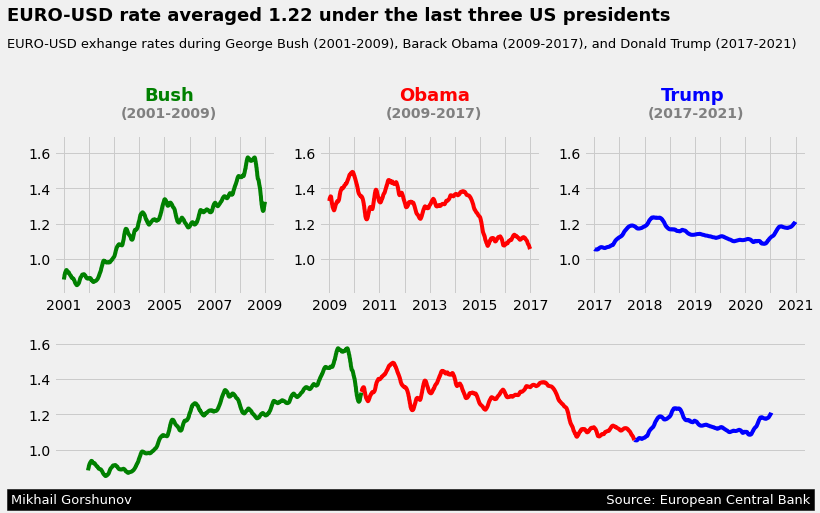

In [50]:
# Adding plots
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
ax1=plt.subplot(2,3,1)
ax2=plt.subplot(2,3,2)
ax3=plt.subplot(2,3,3)
ax4=plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim(bottom=0.8, top=1.7) #setting y-limits
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    
# Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='green')
ax1.set_xticklabels(['', '2001','', '2003','', '2005','', '2007','', '2009'])
ax1.text(12500, 1.9, 'Bush', fontsize=18, weight='bold', color='green')
ax1.text(12150, 1.8, '(2001-2009)', weight='bold', color='gray')
    
# Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='red')
ax2.set_xticklabels(['', '2009','', '2011','', '2013','', '2015','', '2017'])
ax1.text(16200, 1.9, 'Obama', fontsize=18, weight='bold', color='red')
ax1.text(16000, 1.8, '(2009-2017)', weight='bold', color='gray')

# Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax3.set_xticklabels(['2017','', '2018','', '2019','', '2020','','2021'])
ax1.text(20000, 1.9, 'Trump', fontsize=18, weight='bold', color='blue')
ax1.text(19800, 1.8, '(2017-2021)', weight='bold', color='gray')

# Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'], color='green')
ax4.plot(obama['Time'], obama['rolling_mean'], color='red')
ax4.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax4.set_xticks([])

#Title
ax1.text(10500, 2.2, 'EURO-USD exhange rates during George Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021) ', fontsize=13)
ax1.text(10500, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',fontsize=18, weight='bold')

#Adding signature
ax4.text(10500, 0.7, 'Mikhail Gorshunov' + ' '*115 + 'Source: European Central Bank', color='white', backgroundcolor='black', size=13)

plt.show()